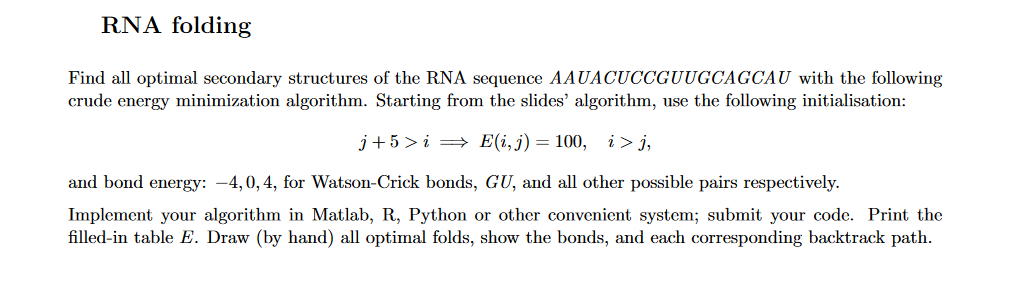

In [29]:
import numpy as np

seq = "AAUACUCCGUUGCAGCAU"

l = len(seq) #sequence length
r = 5        #minimum distance for hairpin formation
e = 100      #initialisation energy 

WC = -4      #Watson-Crick bond energy
GU = 0       #GU bond energy
O  = 4       #other formation enegy
 

s=np.empty(shape=(l,l))   #initializing matrices 
h=np.empty(shape=(l,l))
W=np.empty(shape=(l,l))
V=np.empty(shape=(l,l))


            
for i in range(l):
    for j in range(l):
        
        # hairpin energy matrix
        h[j][i] = 2*(i - j + r)
        
        # stem energy matrix
        if seq[i]+seq[j] in ["AU", "UA", "GC", "CG"]:
            s[j][i] = WC
            
        elif seq[i]+seq[j] in ["GU", "UG"]:
            s[j][i] = GU
            
        else:
            s[j][i] = O
            
        # W, V for j+5>i
        if i < j + r:
            W[j][i] = e
            V[j][i] = e
            
            
            
def minmize_k(j, i):
 

    minimum_energy=e
    min_k = 0
    for k in range (j + 2, i):
        result = matrix_W(k, i) + matrix_W(j, k - 1)
        if result < minimum_energy :
            minimum_energy = result
            min_k = k
    return minimum_energy

def matrix_W(j, i):

    if i >= j + r: 
        W[j][i] = min(
            matrix_W(j, i -1),
            matrix_W(j+1, i),
            matrix_V(j, i),
            minmize_k(j, i)
        )
    
    return W[j][i]

    
def matrix_V(j, i):

    V[j][i] = min(s[j][i] + h[j+1][i-1], 
                  s[j][i] + matrix_W(j+1, i-1))  

    return V[j][i]


matrix_W(0, l-1)

backtrack = []

i=l-1 #initiliazing indexes
j=0 

while i >= j + r:

    a = W[j][i-1] # left
    b = W[j+1][i] # down
    c = V[j][i]   # diagonally

    if W[j][i] == a:
        backtrack.append("left") 
        j=j; i=i-1

    elif W[j][i] == b:
        backtrack.append("down")
        j=j+1; i=i

    elif W[j][i] == c:

        if c == s[j][i] + h[j+1][i-1]:
            backtrack.append("hairpin")
            j=j+1; i=i-1

        elif c == s[j][i] + matrix_W(j+1, i-1):
            backtrack.append("diagonal")
            j=j+1; i=i-1
                
                
                
np.set_printoptions(linewidth=np.inf)
print("                                        W matrix")
print("\n")
print(np.array(W))
print("\n")


backtrack = []

i=l-1 
j=0 

while i >= j + r:

    a = W[j][i-1] 
    b = W[j+1][i] 
    c = V[j][i]   

    if W[j][i] == a:
        backtrack.append("left") 
        j=j; i=i-1

    elif W[j][i] == b:
        backtrack.append("down")
        j=j+1; i=i

    elif W[j][i] == c:

        if c == s[j][i] + h[j+1][i-1]:
            backtrack.append("hairpin")
            j=j+1; i=i-1

        elif c == s[j][i] + matrix_W(j+1, i-1):
            backtrack.append("diagonal")
            j=j+1; i=i-1

print("             From the top right of the matrix, the following path will be followed : ")
print("\n")
print(backtrack)

                                        W matrix


[[100. 100. 100. 100. 100.  12.  12.  12.  12.  12.  10.  10.  10.   8.   4.   4.   0.  -4.]
 [100. 100. 100. 100. 100. 100.  20.  20.  18.  14.  10.  10.  10.   8.   4.   4.   0.  -4.]
 [100. 100. 100. 100. 100. 100. 100.  20.  18.  14.  14.  12.  12.   8.   4.   4.   0.   0.]
 [100. 100. 100. 100. 100. 100. 100. 100.  20.  14.  14.  12.  12.   8.   4.   4.   4.   0.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100.  20.  20.  12.  12.   8.   4.   4.   4.   4.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  20.  12.  12.   8.   8.   8.   8.   8.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  12.  12.  12.  12.  12.  12.  12.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  20.  20.  16.  12.  12.  12.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  20.  16.  12.  12.  12.]
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  16.  16.  14.  14.]
 [100. 100. 100. 10

## The algorithm above is an implementation of Zuker's algorithm for predicting the optimal secondary structures of RNA given the sequence. It is based on the following slides.



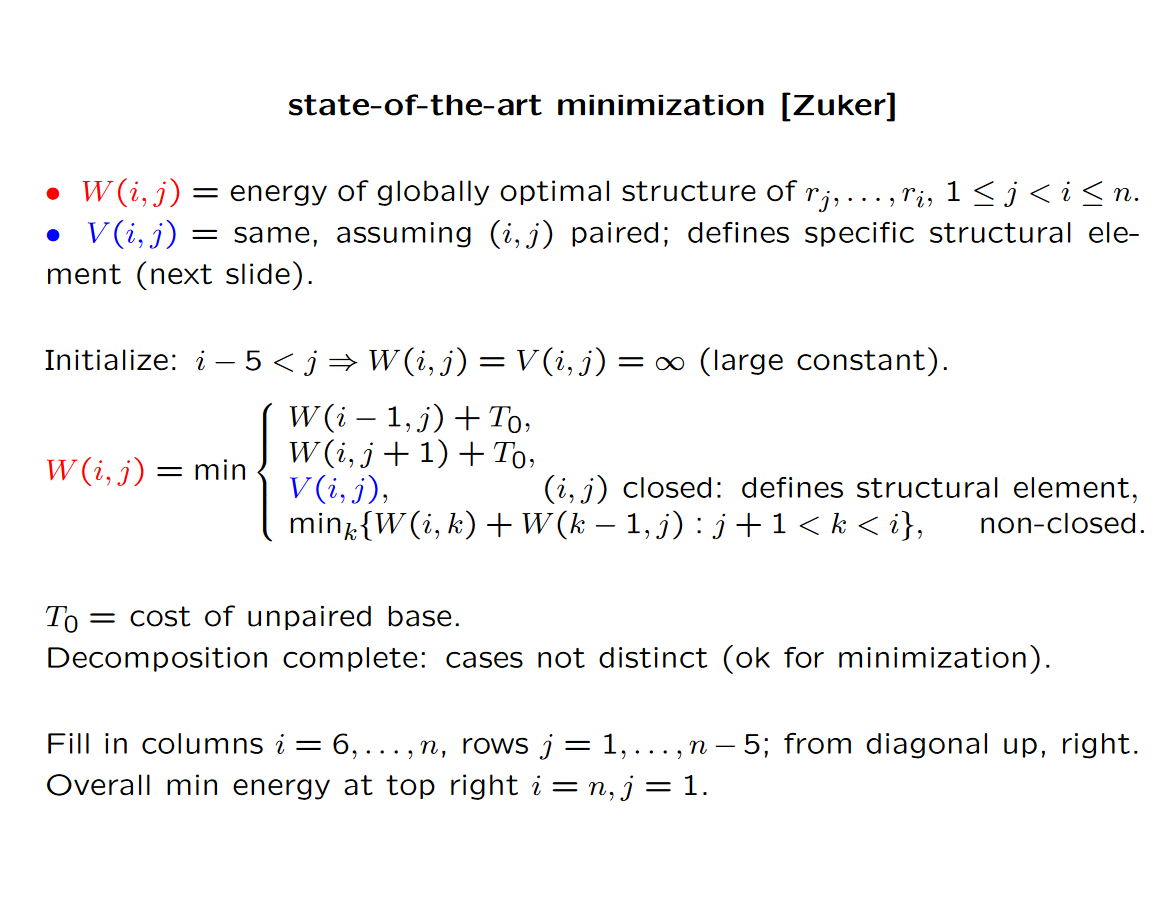

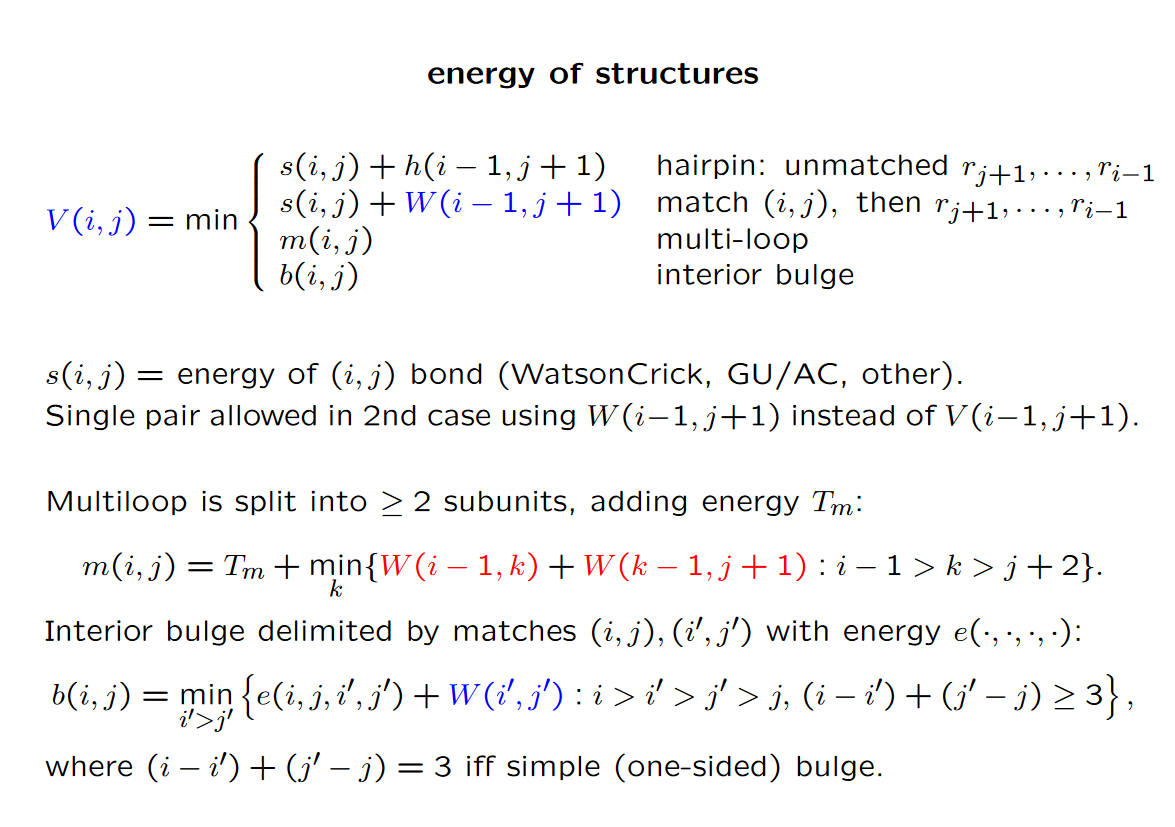